In [82]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
json_df = pd.read_json('world_bank_projects.json')

In [64]:
json_df.head()


,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous People...",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...","[{'code': 'EX', 'name': 'Education'}, {'code':...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,11",PE,IBRD/IDA,L,{'cdata': 'The development objective of the Se...,Ethiopia General Education Quality Improvement...,"[{'DocDate': '28-AUG-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Primary education'}, {'Name': 'Seco...","{'Percent': 46, 'Name': 'Primary education'}","{'Percent': 26, 'Name': 'Secondary education'}","{'Percent': 16, 'Name': 'Public administration...","{'Percent': 12, 'Name': 'Tertiary education'}","[{'code': 'EP', 'name': 'Primary education'}, ...","ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"Project Information Document,Integrated Safegu...",C,4700000,0,P144674,0,MINISTRY OF FINANCE,Specific Investment Loan,IN,5700000,"[{'Percent': 70, 'Name': 'Public Administratio...","[{'code': 'BX', 'name': 'Public Administration...","[Economic management, Social protection and ri...","[{'code': '1', 'name': 'Economic management'},...","1,6",RE,Recipient Executed Activities,L,NaN,TN: DTF Social Protection Reforms Support,"[{'DocDate': '29-MAR-2013', 'EntityID': '00033...",OTHER,Active,Middle East and North Africa,[{'Name': 'Public administration- Other social...,"{'Percent': 70, 'Name': 'Public administration...","{'Percent': 30, 'Name': 'General public admini...",NaN,NaN,"[{'code': 'BS', 'name': 'Public administration...","BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,"Resettlement Plan,Environmental Assessment,Int...",B,0,0,P145310,6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Investment Project Financing,IN,6060000,"[{'Percent': 100, 'Name': 'Transportation'}]","[{'code': 'TX', 'name': 'Transportation'}]","[Trade and integration, Public sector governan...","[{'code': '5', 'name': 'Trade and integration'...","5,2,11,6",PE,IBRD/IDA,L,NaN,Tuvalu Aviation Investment Project - Additiona...,"[{'DocDate': '21-OCT-2013', 'EntityID': '00033...",IDA,Active,East Asia and Pacific,[{'Name': 'Rural and Inter-Urban Roads and Hig...,"{'Percent': 100, 'Name': 'Rural and Inter-Urba...",NaN,NaN,NaN,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17

### 1. Find the 10 countries with most projects


In [65]:
countries = json_df[['countryshortname','countryname' ]]

In [74]:
top_countries = countries.groupby(['countryshortname'])['countryname'].count().sort_values(ascending = False).head(10)
top_countries

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: countryname, dtype: int64

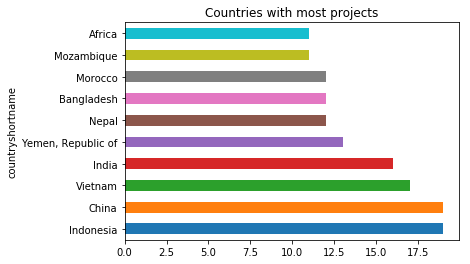

In [79]:
top_countries.plot(kind = 'barh', title ='Countries with most projects')

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [85]:
project_theme.iloc[:,0]

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
5      [{'code': '6', 'name': 'Social protection and ...
6      [{'code': '2', 'name': 'Public sector governan...
7      [{'code': '11', 'name': 'Environment and natur...
8      [{'code': '10', 'name': 'Rural development'}, ...
9      [{'code': '2', 'name': 'Public sector governan...
10     [{'code': '10', 'name': 'Rural development'}, ...
11     [{'code': '10', 'name': 'Rural development'}, ...
12                           [{'code': '4', 'name': ''}]
13     [{'code': '5', 'name': 'Trade and integration'...
14     [{'code': '6', 'name': 'Social protection and ...
15     [{'code': '10', 'name': 'Rural development'}, ...
16     [{'code': '10', 'name': 'Rural development'}, ...
17     [{'code': '8', 'name': '

### To unpack the list of dictionaries, we use json_normalize

In [90]:
#Reloading the json file without using Pandas 

df2 = json.load((open('world_bank_projects.json')))

In [92]:
project_theme = json_normalize(df2,'mjtheme_namecode')['name'] ## Normalizing df2 by column 'mjtheme_namecode' and naming it as 'name'

#Converting it to dataframe

project_theme = pd.DataFrame(project_theme)

project_theme.head()



,name
0,Human development
1,
2,Economic management
3,Social protection and risk management
4,Trade and integration


In [99]:
project_theme_final = project_theme.groupby(['name']).size().sort_values(ascending = False) 
project_theme_final

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
dtype: int64

### Plotting the above values in a bar graph

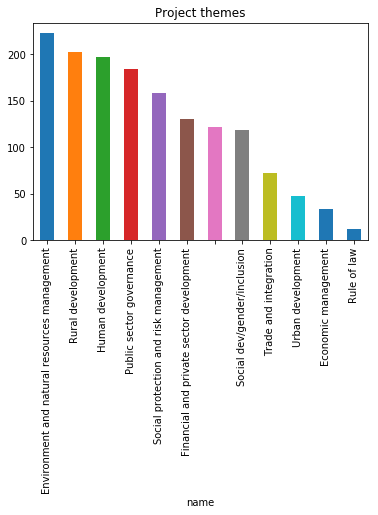

In [100]:
project_theme_final.plot(kind = 'bar', title = 'Project themes')

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [102]:
project_theme_final

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
dtype: int64

In [105]:
empty_col = project_theme['name'].replace ('', 'N/A')

In [107]:
empty_col.value_counts(dropna = False)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
N/A                                             122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64